In [122]:
# pipeline

In [123]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [124]:
order = [
         ("Scaler", StandardScaler()),
         ("svc", SVC())
]
pipeline = Pipeline(order, verbose=True)
print(pipeline.steps)

[('Scaler', StandardScaler()), ('svc', SVC())]


In [125]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=1)

In [126]:
pipeline.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing Scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s


Pipeline(steps=[('Scaler', StandardScaler()), ('svc', SVC())], verbose=True)

In [127]:
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [128]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, pred_train),accuracy_score(y_test, pred_test)

(0.9882629107981221, 0.9790209790209791)

In [129]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'svc__C':[0.001,0.01,0.1, 1, 10, 100],
    'svc__gamma':[0.001, 0.01, 0.1, 1, 10, 100]
}
grid_search = GridSearchCV(pipeline, 
                           param_grid = param_grid,
                           scoring = 'accuracy',
                           cv = 3,
                           n_jobs = -1)

grid_search.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing Scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('svc', SVC())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [130]:
import pandas as pd

pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
25,0.003628,0.000080,0.001509,0.000043,10,0.01,"{'svc__C': 10, 'svc__gamma': 0.01}",0.978873,0.992958,0.978873,0.983568,0.006640,1
30,0.003731,0.000092,0.001638,0.000318,100,0.001,"{'svc__C': 100, 'svc__gamma': 0.001}",0.971831,0.992958,0.978873,0.981221,0.008783,2
31,0.004091,0.000630,0.001249,0.000058,100,0.01,"{'svc__C': 100, 'svc__gamma': 0.01}",0.971831,0.978873,0.978873,0.976526,0.003320,3
24,0.004145,0.000132,0.001980,0.000039,10,0.001,"{'svc__C': 10, 'svc__gamma': 0.001}",0.971831,0.964789,0.964789,0.967136,0.003320,4
19,0.004394,0.000063,0.002769,0.000875,1,0.01,"{'svc__C': 1, 'svc__gamma': 0.01}",0.978873,0.957746,0.964789,0.967136,0.008783,5
20,0.007751,0.000965,0.003730,0.000135,1,0.1,"{'svc__C': 1, 'svc__gamma': 0.1}",0.964789,0.957746,0.971831,0.964789,0.005750,6
26,0.008216,0.002335,0.003255,0.000062,10,0.1,"{'svc__C': 10, 'svc__gamma': 0.1}",0.964789,0.943662,0.957746,0.955399,0.008783,7
32,0.007272,0.000667,0.003368,0.000142,100,0.1,"{'svc__C': 100, 'svc__gamma': 0.1}",0.964789,0.943662,0.957746,0.955399,0.008783,7
18,0.005750,0.000070,0.003276,0.000017,1,0.001,"{'svc__C': 1, 'svc__gamma': 0.001}",0.929577,0.943662,0.950704,0.941315,0.008783,9
13,0.011737,0.006946,0.006329,0.003406,0.1,0.01,"{'svc__C': 0.1, 'svc__gamma': 0.01}",0.936620,0.936620,0.943662,0.938967,0.003320,10


In [131]:
grid_search.best_params_

{'svc__C': 10, 'svc__gamma': 0.01}

In [132]:
pred_train = grid_search.predict(X_train)
pred_test = grid_search.predict(X_test)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9953051643192489, 0.972027972027972)

In [133]:
from sklearn.pipeline import make_pipeline

In [134]:
pipeline2 = make_pipeline(StandardScaler(), SVC())
pipeline2.steps

[('standardscaler', StandardScaler()), ('svc', SVC())]

In [135]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [136]:
accuracy_score(y_test, pipeline.predict(X_test))

0.9790209790209791

In [137]:
# 02/24

In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [139]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [141]:
k_list = range(1,21)
train_acc_list = []
test_acc_list = []

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)

  pred_train = knn.predict(X_train_scaled)
  pred_test = knn.predict(X_test_scaled)

  train_acc_list.append(accuracy_score(y_train, pred_train))
  test_acc_list.append(accuracy_score(y_test, pred_test))

In [142]:
pd.DataFrame(dict(K=k_list,
                  Train = train_acc_list,
                  Test = test_acc_list))

,K,Train,Test
0,1,1.000000,0.972028
1,2,0.981221,0.958042
2,3,0.981221,0.979021
3,4,0.985915,0.979021
4,5,0.981221,0.972028
5,6,0.981221,0.965035
6,7,0.974178,0.972028
7,8,0.974178,0.965035
8,9,0.974178,0.965035
9,10,0.974178,0.958042


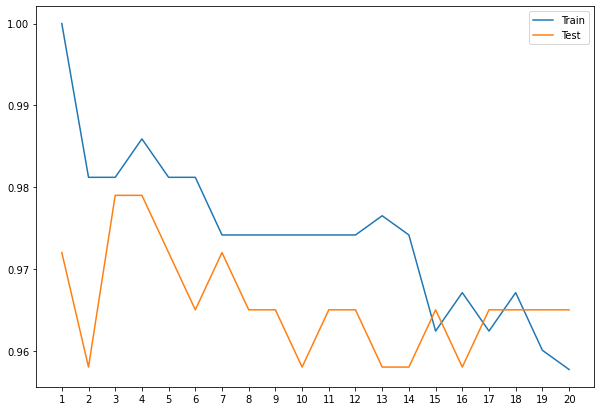

In [143]:
plt.figure(figsize=(10,7))
plt.plot(k_list, train_acc_list, label="Train")
plt.plot(k_list, test_acc_list, label="Test")
plt.xticks(ticks=k_list)
plt.legend()
plt.show()

In [144]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [145]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [146]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [147]:
svc = SVC(kernel='linear',
          C=100, # 높으면 과적합
          random_state= 1)
svc.fit(X_train_scaled, y_train)

SVC(C=100, kernel='linear', random_state=1)

In [148]:
pred_train = svc.predict(X_train_scaled)
pred_test = svc.predict(X_test_scaled)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9953051643192489, 0.958041958041958)

In [149]:
pred_train = svc.predict(X_train_scaled)
pred_test = svc.predict(X_test_scaled)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9953051643192489, 0.958041958041958)

In [150]:
pred_train = svc.predict(X_train_scaled)
pred_test = svc.predict(X_test_scaled)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(0.9953051643192489, 0.958041958041958)

In [151]:
rbf_svc = SVC(kernel='rbf',
              C = 1,
              gamma = 0.01,
              probability=True,
              random_state = 1)

In [152]:
rbf_svc.fit(X_train_scaled, y_train)

pred_train = rbf_svc.predict(X_train_scaled)
pred_test = rbf_svc.predict(X_test_scaled)

In [153]:
# 0303

In [154]:
import pandas as pd 
wine = pd.read_csv('sample_data/wine.csv')

In [155]:
wine.shape

(1599, 12)

In [156]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [157]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [158]:
wine['color'].value_counts()

KeyError: ignored

In [159]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [160]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [161]:
y = wine['color']
X = wine.drop('color',axis=1) # 위아래를 지우기 위해 (1모양이니까 세로)
wine.shape, X.shape, y.shape

KeyError: ignored

In [164]:
encoder = LabelEncoder()
X['quality'] = encoder.fit_transform(X['quality'])
encoder.classes_

IndexError: ignored

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=1)

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [166]:
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

In [167]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(1.0, 0.9300699300699301)

In [168]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       267

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426



In [169]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, pred_train)

array([[159,   0],
       [  0, 267]])

In [170]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        53
           1       0.95      0.93      0.94        90

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143



In [171]:
from sklearn.tree import export_graphviz
from graphviz import Source
graph = Source(export_graphviz(tree, 
                               out_file=None,
                               feature_names = X_train.columns,
                               class_names = ['White', 'Red'],
                               filled = True,
                               rounded = True))
graph

AttributeError: ignored

In [172]:
tree.feature_importances_

array([0.        , 0.02107272, 0.02815513, 0.        , 0.        ,
       0.        , 0.00159699, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02287018, 0.        ,
       0.        , 0.        , 0.0096886 , 0.        , 0.        ,
       0.        , 0.0593675 , 0.01291125, 0.13096215, 0.        ,
       0.00668975, 0.00981053, 0.6968752 , 0.        , 0.        ])

In [173]:
params = {
    'max_depth': range(2,15),
    'min_samples_leaf': [100, 1000],
    'max_leaf_nodes': [5, 10]
}

gs = GridSearchCV(tree,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = 10,
                  n_jobs = -1)

In [174]:
gs.fit(X_train, y_train)
gs.fit(X_test, y_test)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': range(2, 15), 'max_leaf_nodes': [5, 10],
                         'min_samples_leaf': [100, 1000]},
             scoring='accuracy')

In [175]:
pred_train = gs.predict(X_train)
pred_test = gs.predict(X_test)

In [176]:
gs.best_params_

{'max_depth': 2, 'max_leaf_nodes': 5, 'min_samples_leaf': 100}

In [177]:
best = gs.best_estimator_
graph = Source(export_graphviz(best, 
                               out_file=None,
                               feature_names = X_train.columns,
                               class_names = ['White', 'Red'],
                               filled = True,
                               rounded = True))
graph

AttributeError: ignored

In [222]:
# random forest (bagging Ensemble + decision tree)

In [223]:
from sklearn.ensemble import RandomForestClassifier

In [224]:
X_train.shape

(80, 1)

In [225]:
rf = RandomForestClassifier(n_estimators = 200,
                            max_features = 7,
                            max_depth=5,
                            n_jobs = -1,
                            random_state=1)
rf.fit(X_train, y_train)

pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

ValueError: ignored

In [ ]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

In [ ]:
wine = pd.read_csv('sample_data/wine.csv')
y = wine['color']
X = wine.drop('color', axis=1)

In [ ]:
np.array(X['quality']).reshape(-1,1)

In [ ]:
ohe = OneHotEncoder()
quality = ohe.fit_transform(np.array(X['quality']).reshape(-1,1)).toarray()
quality

In [ ]:
ohe.get_feature_names()

In [ ]:
X = pd.concat([X, pd.DataFrame(quality, columns = ohe.get_feature_names())], axis=1)

In [ ]:
X

In [ ]:
X.drop('quality', axis=1, inplace=True)
X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(n_estimators=200)
svc = SVC(C=1, gamma=0.1, probability=True)

In [178]:
# 다 다른 종류니까 voting 그 전에 pipeline
# pipeline - 전처리, 스케일링, 인코딩
knn_pipe = make_pipeline(StandardScaler(), knn)
svc_pipe = make_pipeline(StandardScaler(), svc)
estimators = [('knn', knn_pipe),
              ('random forest', rf),
              ('svc', svc_pipe)]

# voting
voting = VotingClassifier(estimators)

In [179]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def print_metrics(y, y_pred, title = None):
  if title:
    print(title)
  metrics = f'정확도:{accuracy_score(y, y_pred)}, 재현율:{recall_score(y, y_pred)}, 정밀도:{precision_score(y, y_pred)}, fl:{f1_score(y, y_pred)}'
  print(metrics)

In [180]:
voting.fit(X_train, y_train)

ValueError: ignored

In [181]:
pred_train = voting.predict(X_train)
pred_test = voting.predict(X_test)

AttributeError: ignored

In [ ]:
print_metrics(y_train, pred_train)
print_metrics(y_test, pred_test)

In [ ]:
# voting의 default 값은 hard임, soft 하려면 줘야함
voting_soft = VotingClassifier(estimators, voting = 'soft')

In [ ]:
voting_soft.fit(X_train, y_train)

pred_train_soft = voting_soft.predict(X_train)
pred_test_soft = voting_soft.predict(X_test)

In [182]:
print_metrics(y_train, pred_train_soft)
print_metrics(y_test, pred_test_soft)

정확도:0.9953051643192489, 재현율:1.0, 정밀도:0.9925650557620818, fl:0.9962686567164178
정확도:0.965034965034965, 재현율:0.9888888888888889, 정밀도:0.956989247311828, fl:0.9726775956284154


In [183]:
# 03/07 boosting

In [184]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [185]:
data = load_breast_cancer()
X, y = data['data'], data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)
y_train.shape, y_test.shape

((426,), (143,))

In [186]:
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [187]:
pred_train = gb.predict(X_train)
pred_test = gb.predict(X_test)

In [188]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(1.0, 0.958041958041958)

In [189]:
import pandas as pd
fi = gb.feature_importances_
fis = pd.Series(fi, index=data['feature_names'])

In [190]:
fis.sort_values(ascending= False)

worst radius               0.383871
worst concave points       0.285990
worst perimeter            0.130654
mean concave points        0.046544
worst area                 0.042472
worst texture              0.041187
worst concavity            0.012790
area error                 0.010906
mean texture               0.009120
mean concavity             0.007964
radius error               0.004788
concavity error            0.003404
worst fractal dimension    0.002838
worst symmetry             0.002546
mean area                  0.002540
fractal dimension error    0.002532
mean compactness           0.001572
compactness error          0.001384
mean perimeter             0.001381
smoothness error           0.001340
symmetry error             0.001267
perimeter error            0.000813
mean radius                0.000656
mean fractal dimension     0.000625
texture error              0.000575
worst compactness          0.000097
worst smoothness           0.000066
mean symmetry              0

In [191]:
fi

array([6.56004947e-04, 9.12048913e-03, 1.38084141e-03, 2.53954604e-03,
       3.15275986e-05, 1.57221418e-03, 7.96379898e-03, 4.65439078e-02,
       3.92816748e-05, 6.25390210e-04, 4.78826205e-03, 5.75334737e-04,
       8.12699315e-04, 1.09057228e-02, 1.34022770e-03, 1.38399110e-03,
       3.40367814e-03, 8.24536284e-06, 1.26671451e-03, 2.53195851e-03,
       3.83871224e-01, 4.11870661e-02, 1.30653593e-01, 4.24715224e-02,
       6.60899343e-05, 9.72342504e-05, 1.27899008e-02, 2.85990013e-01,
       2.54564947e-03, 2.83786994e-03])

In [192]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [100,200,300,400,500], # 트리 개수
    'learning_rate': [0.001, 0.1, 0.2],
    'max_depth': range(1,5), # 웬만하면 5 안 넘는게 좋음
    'subsample': [0.5, 0.7, 1]
}

gs = GridSearchCV(gb,
                  param_grid=param,
                  cv=3,
                  scoring='accuracy',
                  n_jobs=-1)

gs.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 0.2],
                         'max_depth': range(1, 5),
                         'n_estimators': [100, 200, 300, 400, 500],
                         'subsample': [0.5, 0.7, 1]},
             scoring='accuracy')

In [193]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.5}

In [194]:
df= pd.DataFrame(gs.cv_results_)
df.sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
78,0.348744,0.008894,0.001412,0.000009,0.1,2,200,0.5,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.971831,0.971831,0.978873,0.974178,0.003320,1
151,0.287378,0.003864,0.001230,0.000045,0.2,3,100,0.7,"{'learning_rate': 0.2, 'max_depth': 3, 'n_esti...",0.957746,0.971831,0.992958,0.974178,0.014470,1
83,0.809799,0.011989,0.001657,0.000025,0.1,2,300,1,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.957746,0.971831,0.992958,0.974178,0.014470,1
93,0.446976,0.006145,0.001600,0.000024,0.1,3,200,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.964789,0.971831,0.985915,0.974178,0.008783,1
86,1.061232,0.010351,0.001942,0.000056,0.1,2,400,1,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.964789,0.971831,0.985915,0.974178,0.008783,1


In [195]:
model = gs.best_estimator_
m = pd.Series(model.feature_importances_, index=data['feature_names'])

In [196]:
m.sort_values(ascending= False)

worst concave points       0.249645
worst perimeter            0.222472
worst radius               0.181471
mean concave points        0.072334
worst area                 0.062524
area error                 0.045590
worst symmetry             0.026432
worst texture              0.021030
mean texture               0.018533
worst concavity            0.012035
mean area                  0.011135
texture error              0.010491
radius error               0.009121
worst compactness          0.008886
concavity error            0.007978
fractal dimension error    0.007519
mean symmetry              0.004420
smoothness error           0.003954
symmetry error             0.003803
mean compactness           0.003423
mean concavity             0.003220
perimeter error            0.002787
compactness error          0.002304
mean fractal dimension     0.001955
worst fractal dimension    0.001618
mean radius                0.001582
mean perimeter             0.001439
concave points error       0

In [197]:
# XGBoost

In [198]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [199]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200,
                    learning_rate=0.5,
                    max_depth=2,
                    random_state=1)
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.5, max_depth=2, n_estimators=200, random_state=1)

In [200]:
pred_train = xgb.predict(X_train)
pred_test = xgb.predict(X_test)

In [201]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)

(1.0, 0.965034965034965)

In [202]:
# regression

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [204]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1,
                       noise=30, coef=False, random_state=1)

In [205]:
X.shape, y.shape

((100, 1), (100,))

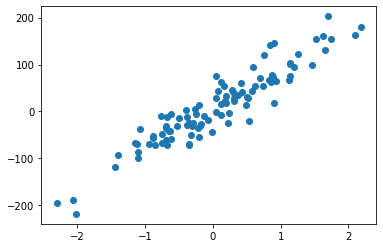

In [206]:
plt.scatter(X,y)

In [207]:
np.mean(y), np.min(y), np.max(y), np.median(y)

(11.131925761438476,
 -218.35217950995258,
 202.95633640879163,
 4.552552367183393)

In [208]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [209]:
pred = lr.predict(X)

In [210]:
from sklearn.metrics import mean_squared_error, r2_score 

mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)

print(mse, r2, np.sqrt(mse))

748.2770205230797 0.8791979968955662 27.354652630276256


In [211]:
lr.coef_, lr.intercept_

(array([83.37148916]), 6.081043166432561)

In [212]:
y_hat = X*lr.coef_ + lr.intercept_

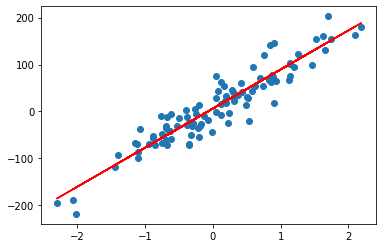

In [213]:
plt.scatter(X, y)
plt.plot(X, y_hat, color = 'red')

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [215]:
knn = KNeighborsRegressor(n_neighbors=3)
tree = DecisionTreeRegressor(max_depth=5)
rf = RandomForestRegressor(n_estimators=200, max_depth=2)
lr = LinearRegression()

estimators=[('knn', knn),('tree',tree),('rf',rf),('lr',lr)]

In [216]:
# 여러개 한 번에 
def print_metrics(y, y_pred, title=None):
  mse = mean_squared_error(y, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y, y_pred)

  if title:
    print(title)
  print(f"MSE:{mse}, RMSE:{rmse}, R2:{r2}")

In [217]:
for name, model in estimators:
  model.fit(X_train, y_train)
  pred_train = model.predict(X_train)
  pred_test = model.predict(X_test)

  print_metrics(y_train, pred_train, name+" Train")
  print_metrics(y_test, pred_test, name+" Test")
  print("-"*70)

knn Train
MSE:518.5805009545331, RMSE:22.772362656398503, R2:0.9145690683638479
knn Test
MSE:1111.7165014848215, RMSE:33.34241295234677, R2:0.8326862049646492
----------------------------------------------------------------------
tree Train
MSE:308.3248571701649, RMSE:17.55918156322113, R2:0.9492065749750584
tree Test
MSE:1806.211010940225, RMSE:42.49954130270378, R2:0.7281644929517379
----------------------------------------------------------------------
rf Train
MSE:698.8034598320654, RMSE:26.434890955554657, R2:0.8848791451006486
rf Test
MSE:965.822730936882, RMSE:31.077688635689785, R2:0.8546432780042147
----------------------------------------------------------------------
lr Train
MSE:718.6380926330148, RMSE:26.80742607250862, R2:0.8816115884614631
lr Test
MSE:869.5538784172734, RMSE:29.488198968693787, R2:0.8691317802772685
----------------------------------------------------------------------


In [218]:
estimators=[('knn', knn),('rf',rf),('lr',lr)]

vote = VotingRegressor(estimators)
vote.fit(X_train, y_train)
pred_train = vote.predict(X_train)
pred_test = vote.predict(X_test)

In [219]:
print_metrics(y_train, pred_train)
print_metrics(y_test, pred_test)

MSE:572.4727546765574, RMSE:23.926402877920395, R2:0.9056908605736015
MSE:911.0464618692343, RMSE:30.183546210961268, R2:0.8628871292408788


In [220]:
tree2 = DecisionTreeRegressor(max_depth=3)

tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

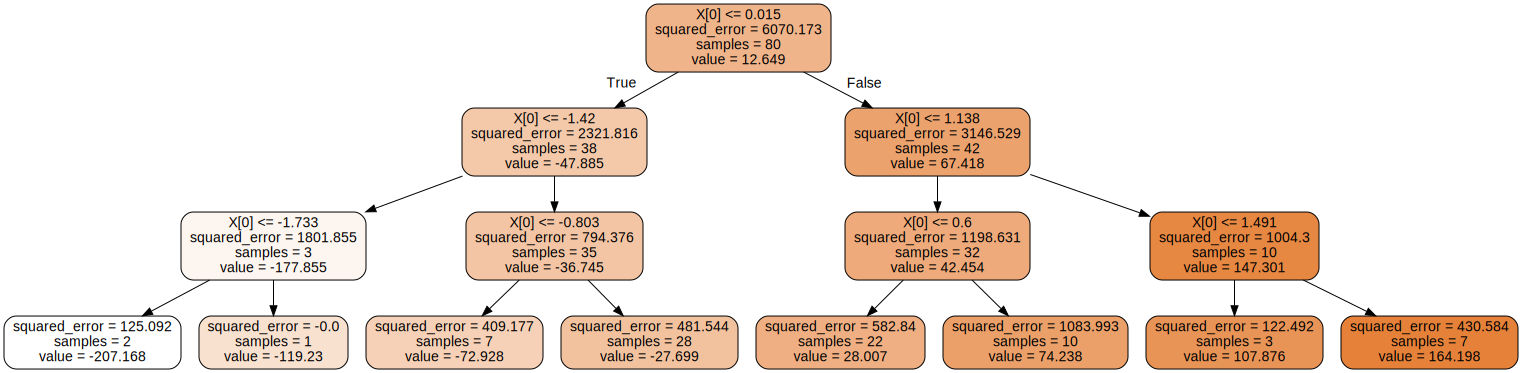

In [221]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(tree2,
                               out_file=None,
                               rounded=True,
                               filled=True))

display(SVG(graph.pipe(format='svg')))